In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [103]:
df = pd.read_csv('FAANG.csv')

In [104]:
print(df.head())
print(df.shape)

                  date  open_aapl  close_aapl   open_amzn  close_amzn  \
0  2012-05-18 00:00:00  76.279999   75.768570  219.410004  213.850006   
1  2012-05-21 00:00:00  76.357140   80.182854  214.029999  218.110001   
2  2012-05-22 00:00:00  81.364288   79.567146  218.309998  215.330002   
3  2012-05-23 00:00:00  79.642860   81.508568  214.710007  217.279999   
4  2012-05-24 00:00:00  82.267143   80.760002  216.979996  215.240005   

     open_fb   close_fb  open_googl  close_googl  open_nflx  close_nflx  
0  42.049999  38.230000  312.862854   300.500488  10.328571    9.994286  
1  36.529999  34.029999  300.555542   307.362366   9.978572   10.248571  
2  32.610001  31.000000  307.027039   300.700714  10.257143    9.672857  
3  31.370001  32.000000  301.126129   305.035034   9.638572   10.272857  
4  32.950001  33.029999  304.884888   302.132141  10.217143   10.038571  
(1924, 11)


In [105]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close_aapl'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close_aapl'][i] = data['close_aapl'][i]

In [106]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

In [107]:
dataset = new_data.values

In [108]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [109]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [110]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [111]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 29s - loss: 5.6167e-04


In [112]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [113]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [114]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [115]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

5.7440476840402415

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Price')

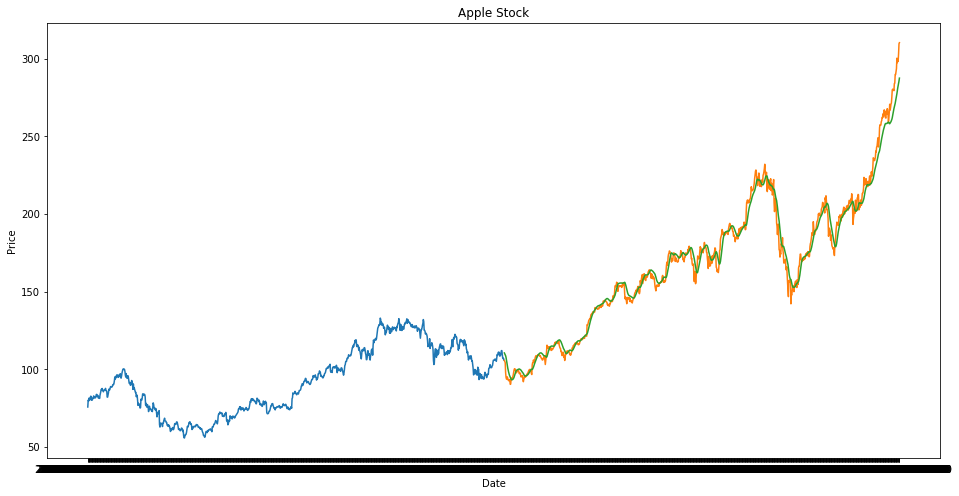

In [116]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['close_aapl'])
plt.plot(valid[['close_aapl','Predictions']])
plt.title('Apple Stock')
plt.xlabel('Date')
plt.ylabel('Price')

In [117]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close_amzn'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close_amzn'][i] = data['close_amzn'][i]

In [118]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [119]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [120]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 30s - loss: 3.0830e-04


In [121]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [122]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [123]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

45.81857921067631

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Price')

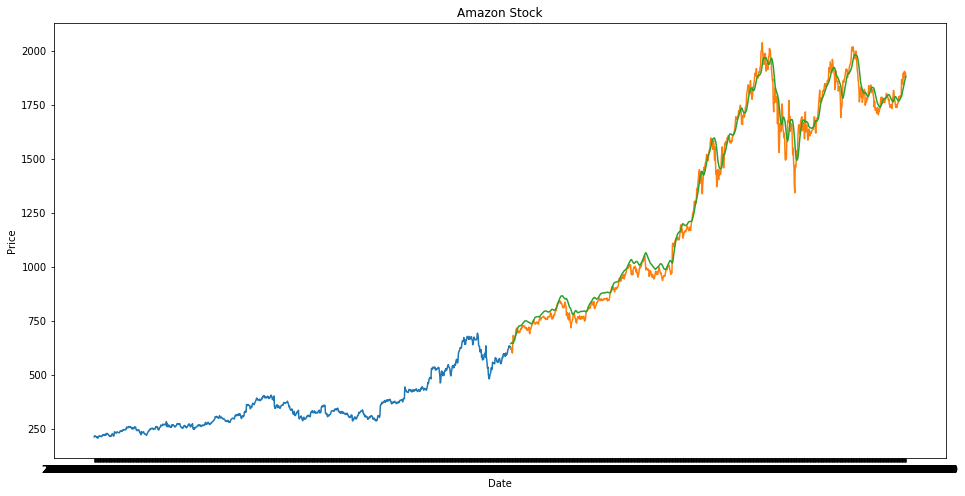

In [124]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['close_amzn'])
plt.plot(valid[['close_amzn','Predictions']])
plt.title('Amazon Stock')
plt.xlabel('Date')
plt.ylabel('Price')

In [125]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close_fb'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close_fb'][i] = data['close_fb'][i]

In [126]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [127]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [128]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 30s - loss: 5.6257e-04


In [129]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [130]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [131]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

8.249852581449387

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Price')

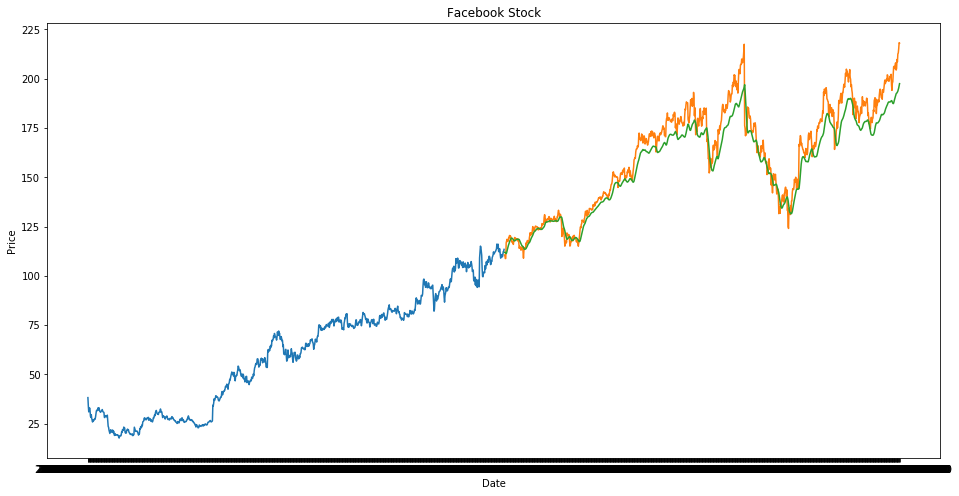

In [132]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['close_fb'])
plt.plot(valid[['close_fb','Predictions']])
plt.title('Facebook Stock')
plt.xlabel('Date')
plt.ylabel('Price')

In [133]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close_googl'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close_googl'][i] = data['close_googl'][i]

In [134]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [135]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [136]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 28s - loss: 8.7410e-04


In [137]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [138]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [139]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

29.01075480424849

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Price')

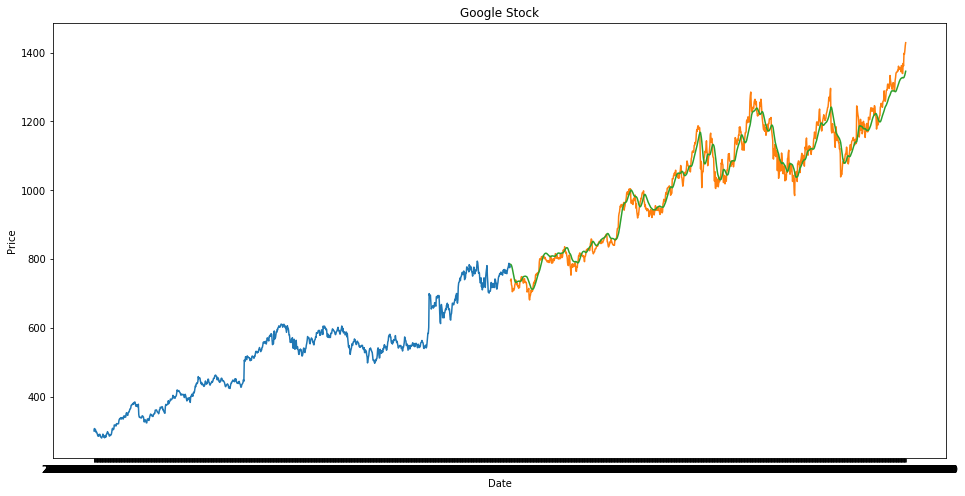

In [140]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['close_googl'])
plt.plot(valid[['close_googl','Predictions']])
plt.title('Google Stock')
plt.xlabel('Date')
plt.ylabel('Price')

In [141]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close_nflx'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close_nflx'][i] = data['close_nflx'][i]

In [142]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [143]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [144]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 29s - loss: 4.3883e-04


In [145]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [146]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [147]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

23.410400415306675

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Price')

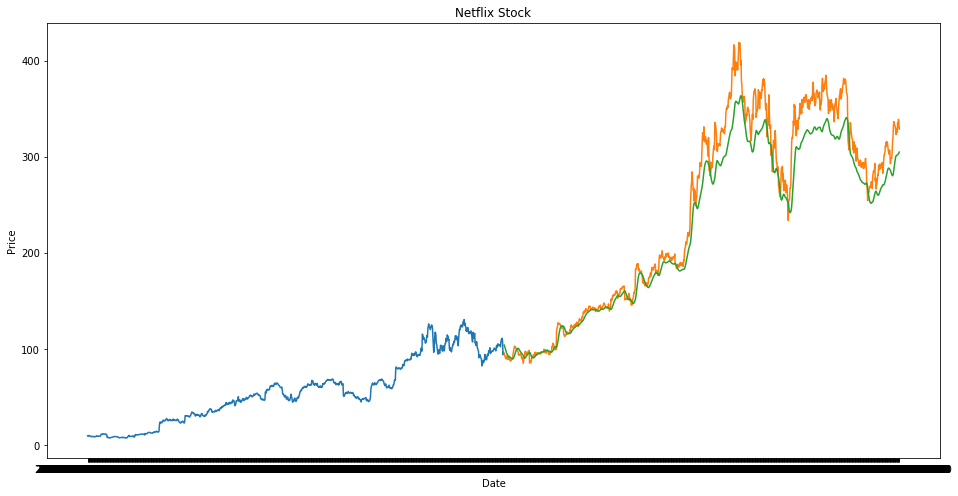

In [148]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['close_nflx'])
plt.plot(valid[['close_nflx','Predictions']])
plt.title('Netflix Stock')
plt.xlabel('Date')
plt.ylabel('Price')